# 均值回归_Mean Reverting Strategy

In [134]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
import warnings; warnings.simplefilter('ignore')       #忽略警告信息；

In [135]:
import numpy as np
import pandas as pd
import tushare as ts

### 策略思想

均值回归策略应用了股市投资中经典的高抛低吸思想，该类型策略一般在震荡市中表现优异；
但是在单边趋势行情中一般表现糟糕，往往会大幅跑输市场；

### 1. 数据准备 & 回测准备

In [139]:
data = ts.get_k_data('601688', '2016-08-19', '2020-08-19')[['date','close']]

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


In [140]:
data.set_index('date', inplace = True)

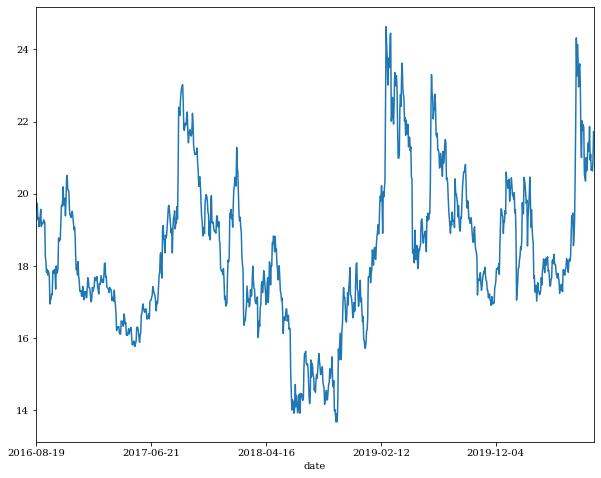

In [141]:
data['close'].plot(figsize = (10,8))

### 2. 策略开发思路

In [142]:
data['returns'] = np.log(data['close'] / data['close'].shift(1))

In [143]:
SMA = 50

In [144]:
data['SMA'] = data['close'].rolling(SMA).mean()

In [145]:
data.tail()

,close,returns,SMA
date,,,
2020-08-12,20.70,0.002418,20.4354
2020-08-13,20.63,-0.003387,20.4902
2020-08-14,20.92,0.013959,20.5530
2020-08-17,21.72,0.037528,20.6326
2020-08-18,21.51,-0.009716,20.7048


In [146]:
threshold = 2.2 #阈值；

In [147]:
data['distance'] = data['close'] - data['SMA']

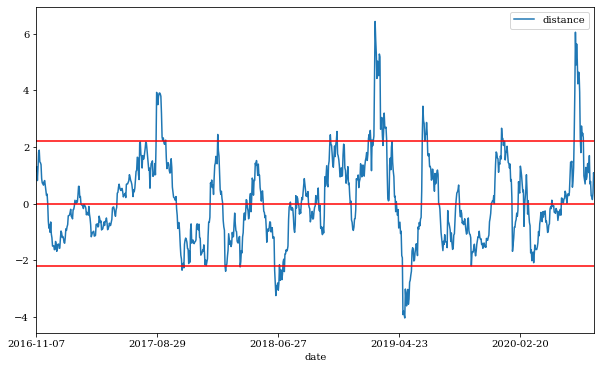

In [148]:
data['distance'].dropna().plot(figsize=(10, 6), legend=True)
plt.axhline(threshold, color='r')
plt.axhline(-threshold, color='r')
plt.axhline(0, color='r')

In [149]:
data['position'] = np.where(data['distance'] > threshold, -1, np.nan)           #核心精髓；

In [150]:
data['position'] = np.where(data['distance'] < -threshold, 1, data['position'])

In [151]:
data['position'] = np.where(data['distance'] *
            data['distance'].shift(1) < 0, 0, data['position'])

In [152]:
data['position'] = data['position'].ffill().fillna(0)

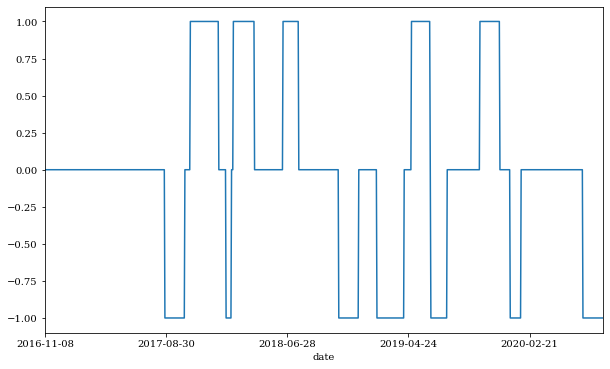

In [153]:
data['position'].ix[SMA:].plot(ylim=[-1.1, 1.1], figsize=(10, 6))

### 3. 计算策略年化收益并可视化

In [154]:
data['strategy'] = data['position'].shift(1) * data['returns']

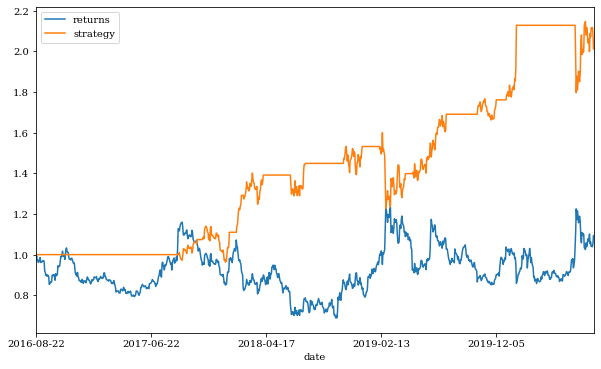

In [155]:
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6))

思考：对比趋势策略收益要更好，国内大部分股票应该都是均值回归类型。具体哪些股票有待进一步研究，均值回归vs趋势型股票池子Stock_universe to be discovered..